# Predicting ‘Wait time’ categories for On-Demand Food Delivery Service Using Smartphone Dataset

## Ashok K Yannam

### Experiment and Data Collection

This experiment has been carried out by simulating myself as an UberEats/DoorDash driver for three different trips and restaurants. Each trip performed five activities (WALKING, DRIVING,  SITTING, STANDING, LAYING) with a smartphone (iPhone X). Using its embedded sensors GPS, IMI, etc., captured the data during entire duration of each trip at a constant rate of 1 Hz.  For each record it is provided:

- CLLocation: latitude, longitude, altitude, speed, course, verticalAccuracy, horizontalAccuracy, floor
- CLHeading: heading.x, heading.y, heading.z, trueHeading, magneticHeading, headingAccuracy
- Core ML Model output (supported type int, double, string, dictionary)
- CMMotionActivity: Activity, activity.startDate, activity.confidence
- CMAltimeter: relativeAltitude, pressure 
-  WIFI and network carrier IP addresses 
- Device orientation

The datasets are preprocessed and manually labeled to create dataset to use for training and test dataset with below data points

- CLLocation: latitude, longitude, speed of the driver
- CMMotionActivity: Activity, activity.startDate, activity.confidence of the driver
- Timestamps, Sample numbers, latitude & longtitude for restaurant and destination

Below are the frameworks used

- Pandas Documentation: http://pandas.pydata.org/
- Scikit Learn Documentation: http://scikit-learn.org/stable/documentation.html
- Seaborn Documentation: http://seaborn.pydata.org/


## Trip 1 
- Restaurant: Starbucks, Market place, San Ramon CA
- Destination: GE Digital, San Ramon CA

![title](images/2018-10-13_Trip1_Starbucks.png)


## Trip 2
- Restaurant: Chipotle, San Ramon CA
- Destination: Falcon Bridge, San Ramon CA

![title](images/2018-10-13_Trip2_Chipotle.png)


## Trip 3
- Restaurant: Similan Thai, Danville CA
- Destination: Falcon Bridge, San Ramon CA

![title](images/2018-10-13_Trip3_Similan.png)

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data and Feature Engineering

In [2]:
df = pd.read_csv('processedDataset/onDemandFoodDelivery_AllTrips.csv')


In [3]:
df.head()

,loggingTime,loggingSample,tripID,locationTimestamp_since1970,locationLatitude,locationLongitude,locationSpeed,activity,activityActivityConfidence,activityActivityStartDate,restLatitude,restLongitude,destLatitude,destLongitude,restDistance,destDistance,label
0,1.539477e+09,1,b883f620-8ccc-462c-a8cd-41cc9aa86e95,1.539477e+09,37.773821,-121.931593,0.15,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,preWait
1,1.539477e+09,2,b883f620-8ccc-462c-a8cd-41cc9aa86e95,1.539477e+09,37.773821,-121.931593,0.15,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,preWait
2,1.539477e+09,3,b883f620-8ccc-462c-a8cd-41cc9aa86e95,1.539477e+09,37.773821,-121.931593,0.00,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,preWait
3,1.539477e+09,4,b883f620-8ccc-462c-a8cd-41cc9aa86e95,1.539477e+09,37.773821,-121.931593,0.00,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,preWait
4,1.539477e+09,5,b883f620-8ccc-462c-a8cd-41cc9aa86e95,1.539477e+09,37.773821,-121.931593,0.00,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,preWait


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 17 columns):
loggingTime                    3720 non-null float64
loggingSample                  3720 non-null int64
tripID                         3720 non-null object
locationTimestamp_since1970    3720 non-null float64
locationLatitude               3720 non-null float64
locationLongitude              3720 non-null float64
locationSpeed                  3720 non-null float64
activity                       3720 non-null int64
activityActivityConfidence     3720 non-null int64
activityActivityStartDate      3720 non-null float64
restLatitude                   3720 non-null float64
restLongitude                  3720 non-null float64
destLatitude                   3720 non-null float64
destLongitude                  3720 non-null float64
restDistance                   3720 non-null float64
destDistance                   3720 non-null float64
label                          3720 non-null object


In [5]:
df['label'].value_counts()

preWait     1540
postWait    1529
restWait     651
Name: label, dtype: int64

In [6]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1,lon1,lat2,lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c # Radius of earth in kilometers. Use 3956 for mi
    meters = km
    return meters



In [7]:
X = df.locationSpeed
Y = df.activity
rlat = df['restLatitude']
rlong = df['restLongitude']
driverlat = df['locationLatitude']
driverlong = df['locationLongitude']
dlat = df['destLatitude']
dlong = df['destLongitude']
Z = haversine(rlat, rlong, driverlat, driverlong)
W = haversine(dlat, dlong, driverlat, driverlong)

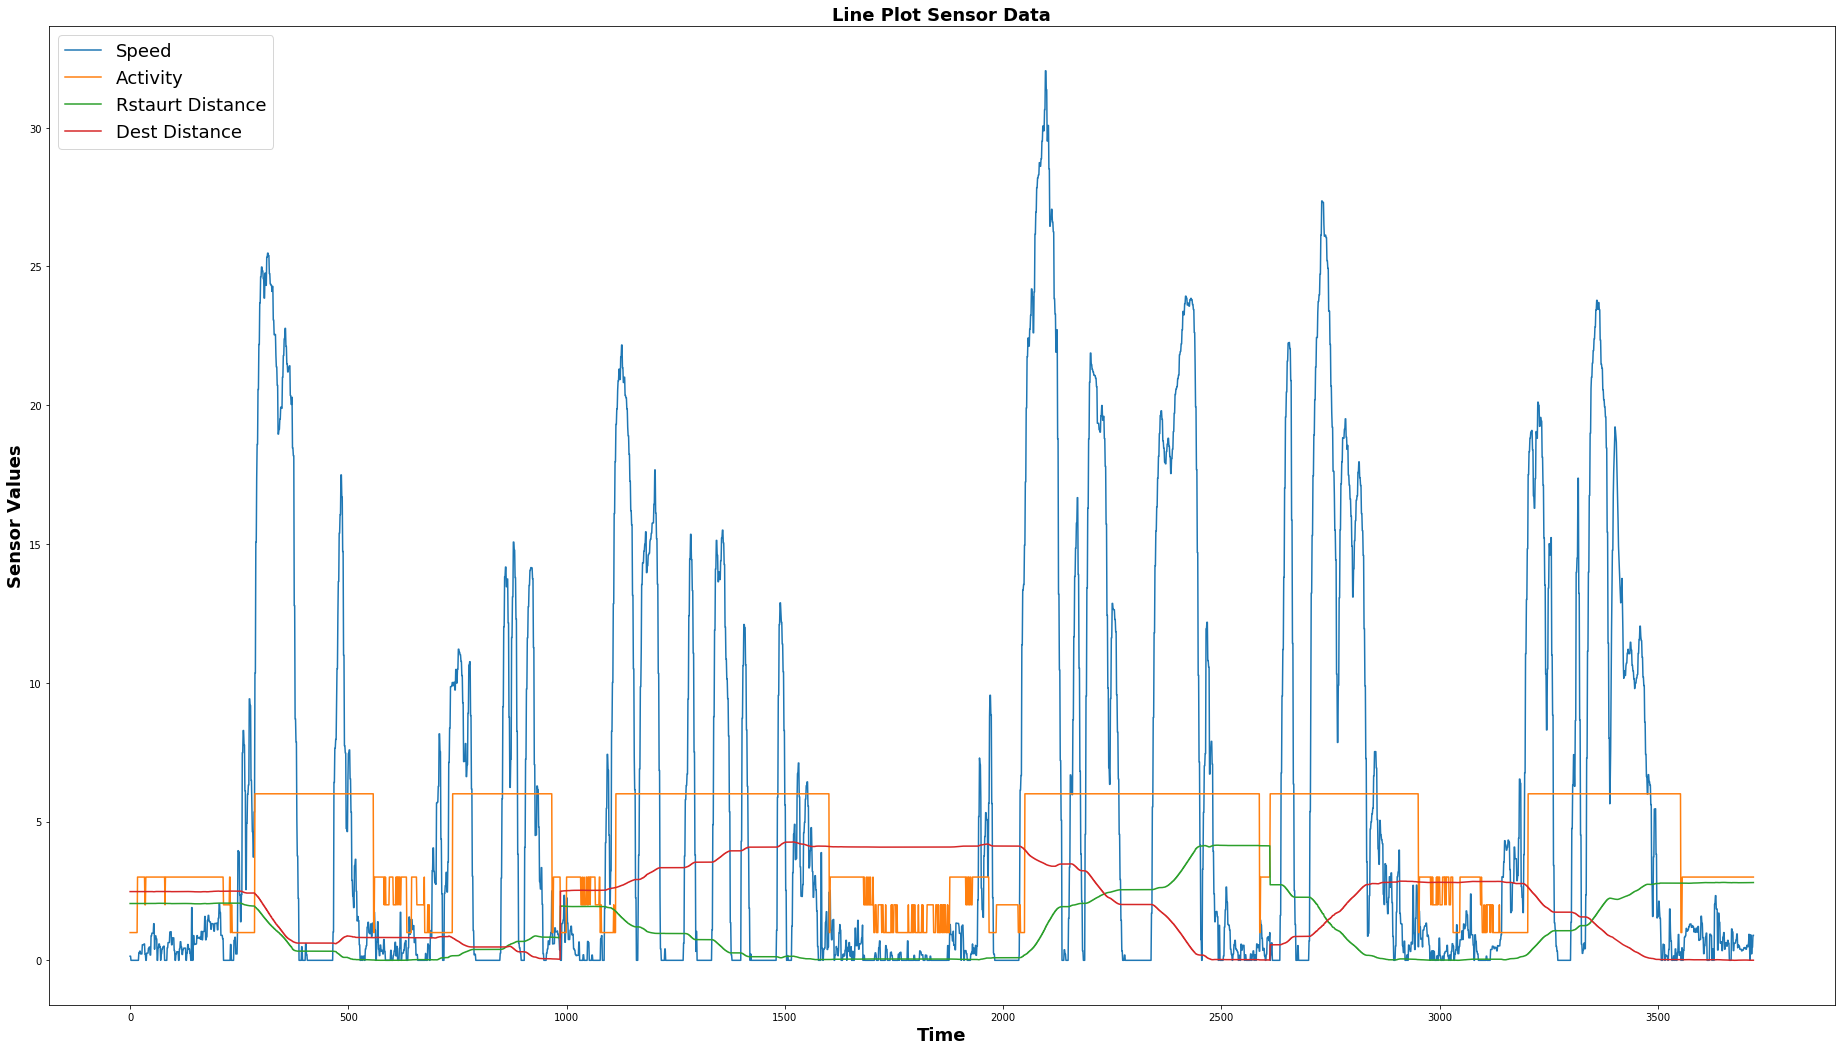

In [10]:

plt.plot(X, label="Speed")
plt.plot(Y, label="Activity")
plt.plot(Z, label="Rstaurt Distance")
plt.plot(W, label="Dest Distance")

# Add legend
plt.legend(loc='upper left', fontsize=18)
# Add title and x, y labels
plt.title("Line Plot Sensor Data", fontsize=18, fontweight='bold')
plt.xlabel("Time", fontsize=18, fontweight='bold')
plt.ylabel("Sensor Values", fontsize=18, fontweight='bold')
plt.rcParams["figure.figsize"] = [16*2,9*2]
plt.show()

In [11]:
df.label.unique()

array(['preWait', 'restWait', 'postWait'], dtype=object)

In [12]:
import seaborn as sns

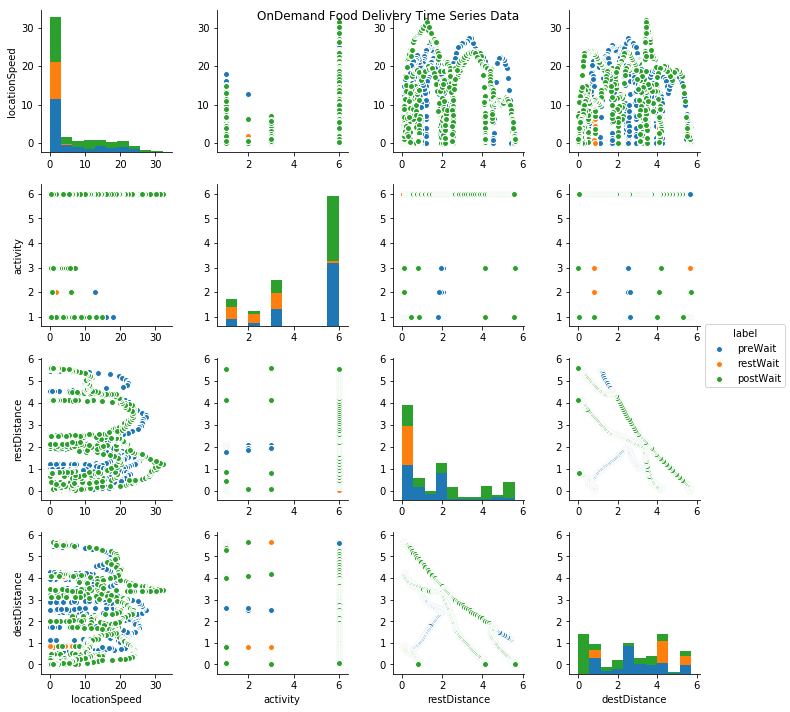

In [13]:
grid = sns.pairplot(df, hue='label', vars=['locationSpeed', 'activity', 'restDistance', 'destDistance'])
grid.fig.suptitle('OnDemand Food Delivery Time Series Data');

## Classification with the features to predict target labels

### 1-hot encoding of features

In [14]:
features = df.drop('label', axis=1)

In [15]:
X = pd.get_dummies(features)

In [16]:
X.head()

,loggingTime,loggingSample,locationTimestamp_since1970,locationLatitude,locationLongitude,locationSpeed,activity,activityActivityConfidence,activityActivityStartDate,restLatitude,restLongitude,destLatitude,destLongitude,restDistance,destDistance,tripID_0d660d17-549d-4b45-a675-9a912c683b03,tripID_1a5c54a4-932c-48c1-8793-750d2b7da835,tripID_b883f620-8ccc-462c-a8cd-41cc9aa86e95
0,1.539477e+09,1,1.539477e+09,37.773821,-121.931593,0.15,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,0,0,1
1,1.539477e+09,2,1.539477e+09,37.773821,-121.931593,0.15,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,0,0,1
2,1.539477e+09,3,1.539477e+09,37.773821,-121.931593,0.00,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,0,0,1
3,1.539477e+09,4,1.539477e+09,37.773821,-121.931593,0.00,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,0,0,1
4,1.539477e+09,5,1.539477e+09,37.773821,-121.931593,0.00,1,2,1.539477e+09,37.763196,-121.950607,37.767207,-121.958499,2.046708,2.47665,0,0,1


### Label encoding

In [17]:
df['label'].value_counts()

preWait     1540
postWait    1529
restWait     651
Name: label, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder 

In [19]:
le = LabelEncoder()
y = le.fit_transform(df['label'])
le.classes_

array(['postWait', 'preWait', 'restWait'], dtype=object)

### Train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

### Fit a Logistic Regression model

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = model.predict(X_test)

In [23]:
model.score(X_train, y_train)

0.41436251920122885

In [24]:
model.score(X_test, y_test)

0.40322580645161288

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
confusion_matrix(y_test, y_pred)

array([[450,   0,   0],
       [470,   0,   0],
       [196,   0,   0]])

#### Looking at the scores of Logistic Regression, we can conclude this model is terrible on this time series data

### Fit a Decision Tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2, random_state=33)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=33,
            splitter='best')

In [28]:
y_pred = model.predict(X_test)

In [29]:
model.score(X_train, y_train)

0.96313364055299544

In [30]:
model.score(X_test, y_test)

0.95878136200716846

In [31]:
df['label'].value_counts()/len(df['label'])

preWait     0.413978
postWait    0.411022
restWait    0.175000
Name: label, dtype: float64

In [32]:
confusion_matrix(y_test, y_pred)

array([[422,   0,  28],
       [  0, 470,   0],
       [  8,  10, 178]])

In [33]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.99910394265232971

In [34]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.99731182795698925

Text(0.5,0,'Max Depth')

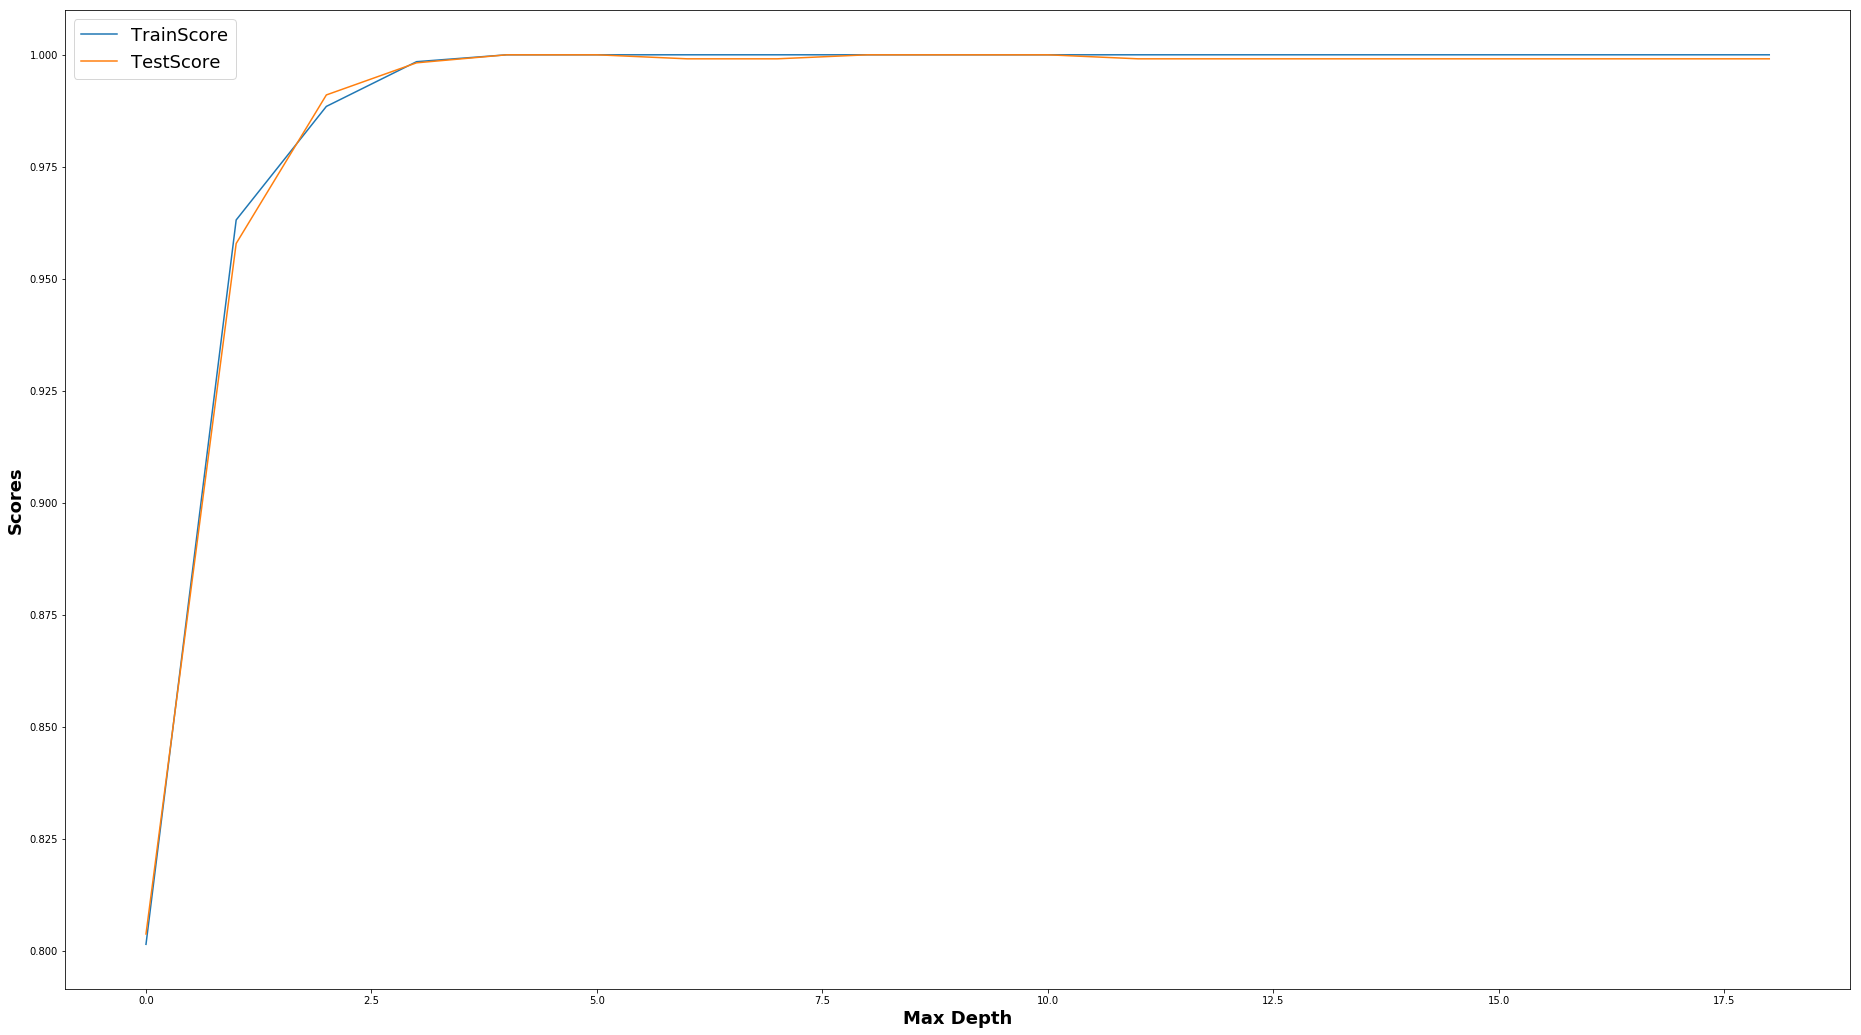

In [35]:
depths = range(1, 20)
scores_test = []
scores_train = []
for d in depths:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    s_train = model.score(X_train, y_train)
    s_test = model.score(X_test, y_test)
    scores_train.append(s_train)
    scores_test.append(s_test)

plt.plot(scores_train, label="TrainScore")
plt.plot(scores_test, label="TestScore")
plt.legend(loc='upper left', fontsize=18)
plt.ylabel('Scores', fontsize=18, fontweight='bold')
plt.xlabel('Max Depth', fontsize=18, fontweight='bold')